In [101]:
%matplotlib inline

In [102]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('./dataset/weatherHistory.csv')

In [104]:
df

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,0.89,14.1197,251,15.8263,0,1015.13
1,9.355556,0.86,14.2646,259,15.8263,0,1015.63
2,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,8.288889,0.83,14.1036,269,15.8263,0,1016.41
4,8.755556,0.83,11.0446,259,15.8263,0,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31,16.1000,0,1014.36
96449,24.583333,0.48,10.0947,20,15.5526,0,1015.16
96450,22.038889,0.56,8.9838,30,16.1000,0,1015.66
96451,21.522222,0.60,10.5294,20,16.1000,0,1015.95


In [105]:
x = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']]
y = df['Temperature (C)']

x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32).reshape(-1, 1)

In [106]:
sc = StandardScaler().fit(x)
x_data = sc.transform(x)

# x_data = normalize(x_data)
# print('Actual: ')
# print(x)

# print('\nNormalized')
# print(x_data)

In [107]:
sc = StandardScaler().fit(y)
y_data = sc.transform(y)

# y_data = normalize(y_data)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33)

In [109]:
model = LinearRegression().fit(X_train, y_train)

### Accuracy

In [110]:
model.score(X_test, y_test)

0.4393147964855969

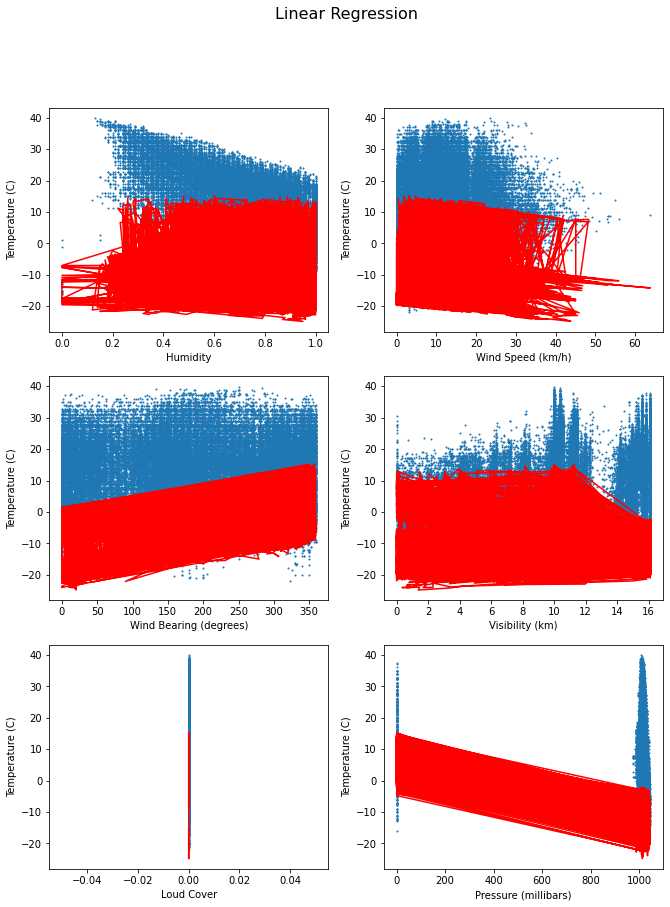

In [111]:
fig, axs = plt.subplots(3, 2)
fig.set_figwidth(11)
fig.set_figheight(14)
fig.suptitle('Linear Regression', fontsize=16)

axs[0,0].scatter(df['Humidity'], df['Temperature (C)'], s=1)
axs[0,0].set(xlabel= 'Humidity', ylabel = 'Temperature (C)')
axs[0,0].plot(df['Humidity'], model.predict(x), color='red')

axs[0,1].scatter(df['Wind Speed (km/h)'], df['Temperature (C)'], s=1)
axs[0,1].set(xlabel= 'Wind Speed (km/h)', ylabel = 'Temperature (C)')
axs[0,1].plot(df['Wind Speed (km/h)'], model.predict(x), color='red')

axs[1,0].scatter(df['Wind Bearing (degrees)'], df['Temperature (C)'], s=1)
axs[1,0].set(xlabel= 'Wind Bearing (degrees)', ylabel = 'Temperature (C)')
axs[1,0].plot(df['Wind Bearing (degrees)'], model.predict(x), color='red')

axs[1,1].scatter(df['Visibility (km)'], df['Temperature (C)'], s=1)
axs[1,1].set(xlabel= 'Visibility (km)', ylabel = 'Temperature (C)')
axs[1,1].plot(df['Visibility (km)'], model.predict(x), color='red')

axs[2,0].scatter(df['Loud Cover'], df['Temperature (C)'], s=1)
axs[2,0].set(xlabel= 'Loud Cover', ylabel = 'Temperature (C)')
axs[2,0].plot(df['Loud Cover'], model.predict(x), color='red')

axs[2,1].scatter(df['Pressure (millibars)'], df['Temperature (C)'], s=1)
axs[2,1].set(xlabel= 'Pressure (millibars)', ylabel = 'Temperature (C)')
axs[2,1].plot(df['Pressure (millibars)'], model.predict(x), color='red')

plt.show()

# Polynomial Regression

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
poly = PolynomialFeatures(4)
X_data = poly.fit_transform(x_data)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)

In [115]:
model2 = LinearRegression().fit(X_train, y_train)

In [116]:
y_predicted = model2.predict(X_test)

In [117]:
y_predicted

array([[ 0.00590515],
       [-0.07363892],
       [-0.8906555 ],
       ...,
       [ 0.9892235 ],
       [-0.9078407 ],
       [-0.14037323]], dtype=float32)

In [118]:
y_test

array([[-0.14825028],
       [ 0.08556999],
       [-1.4697418 ],
       ...,
       [ 1.7775679 ],
       [-1.8989938 ],
       [-1.035255  ]], dtype=float32)

In [119]:
model2.score(X_test, y_test)

0.6087992167936438

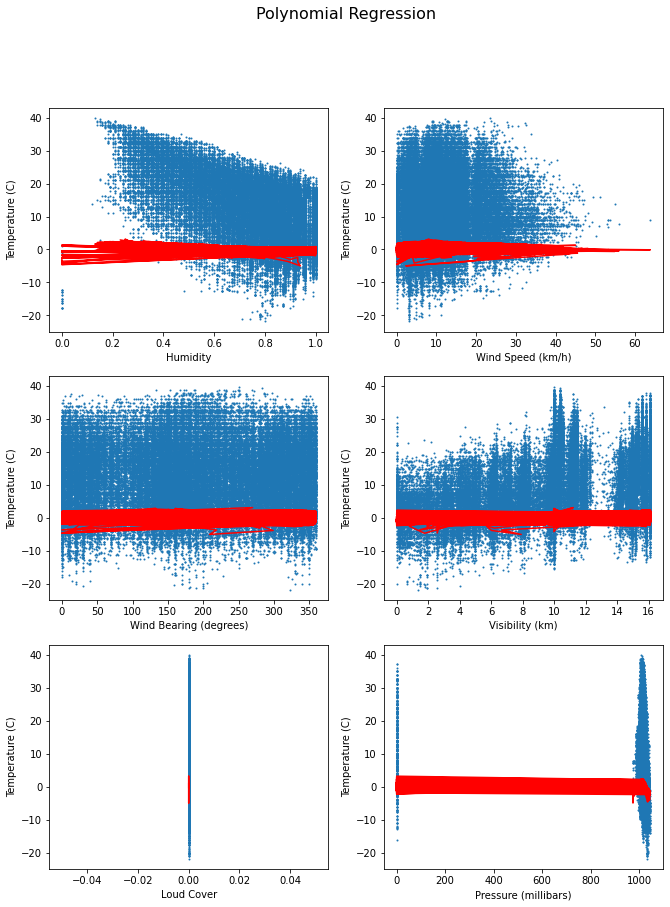

In [120]:
fig, axs = plt.subplots(3, 2)
fig.set_figwidth(11)
fig.set_figheight(14)
fig.suptitle('Polynomial Regression', fontsize=16)

axs[0,0].scatter(df['Humidity'], df['Temperature (C)'], s=1)
axs[0,0].set(xlabel= 'Humidity', ylabel = 'Temperature (C)')
axs[0,0].plot(df['Humidity'], model2.predict(X_data), color='red')

axs[0,1].scatter(df['Wind Speed (km/h)'], df['Temperature (C)'], s=1)
axs[0,1].set(xlabel= 'Wind Speed (km/h)', ylabel = 'Temperature (C)')
axs[0,1].plot(df['Wind Speed (km/h)'], model2.predict(X_data), color='red')

axs[1,0].scatter(df['Wind Bearing (degrees)'], df['Temperature (C)'], s=1)
axs[1,0].set(xlabel= 'Wind Bearing (degrees)', ylabel = 'Temperature (C)')
axs[1,0].plot(df['Wind Bearing (degrees)'], model2.predict(X_data), color='red')

axs[1,1].scatter(df['Visibility (km)'], df['Temperature (C)'], s=1)
axs[1,1].set(xlabel= 'Visibility (km)', ylabel = 'Temperature (C)')
axs[1,1].plot(df['Visibility (km)'], model2.predict(X_data), color='red')

axs[2,0].scatter(df['Loud Cover'], df['Temperature (C)'], s=1)
axs[2,0].set(xlabel= 'Loud Cover', ylabel = 'Temperature (C)')
axs[2,0].plot(df['Loud Cover'], model2.predict(X_data), color='red')

axs[2,1].scatter(df['Pressure (millibars)'], df['Temperature (C)'], s=1)
axs[2,1].set(xlabel= 'Pressure (millibars)', ylabel = 'Temperature (C)')
axs[2,1].plot(df['Pressure (millibars)'], model2.predict(X_data), color='red')

plt.show()